In [ ]:
#필요한 툴
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#한글 깨짐 방지
!pip install koreanize-matplotlib
import koreanize_matplotlib
!pip install pandas openpyxl

In [2]:
demographics = pd.read_excel('인구통계_2022-01-16_2023-05-31.xlsx')

demographics.head()

,성별,나이,채널속성,채널그룹,채널명,고객수,유입수,페이지수,유입당 페이지수,결제수(마지막클릭),유입당 결제율(마지막클릭),결제금액(마지막클릭),유입당 결제금액(마지막클릭),결제수(+14일기여도추정),유입당 결제율(+14일기여도추정),결제금액(+14일기여도추정),유입당 결제금액(+14일기여도추정)
0,(알수없음),(알수없음),모바일,소셜,인스타그램,2342,7154,8051,1.125384,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,남성,26~30,모바일,소셜,인스타그램,354,1341,1632,1.217002,17,0.012677,826000,615.958240,17.897740,0.013347,693194.240963,516.923371
2,남성,26~30,모바일,검색,네이버검색,206,1340,1622,1.210448,15,0.011194,581000,433.582090,17.436937,0.013013,714201.367973,532.986096
3,여성,26~30,모바일,소셜,인스타그램,396,1321,1668,1.262680,28,0.021196,851000,644.208933,31.974913,0.024205,946001.199173,716.125056
4,남성,26~30,모바일,웹사이트,웹사이트,230,1282,1627,1.269111,12,0.009360,649000,506.240250,10.936085,0.008530,684706.361916,534.092326


In [3]:
demographics['성별'].value_counts()

남성        612
여성        599
(알수없음)     66
Name: 성별, dtype: int64

In [8]:
temp = demographics.copy()
temp['속성-채널명'] = temp['채널속성'] + '-' + temp['채널그룹'] + '-' + temp['채널명']
temp.head()

,성별,나이,채널속성,채널그룹,채널명,고객수,유입수,페이지수,유입당 페이지수,결제수(마지막클릭),유입당 결제율(마지막클릭),결제금액(마지막클릭),유입당 결제금액(마지막클릭),결제수(+14일기여도추정),유입당 결제율(+14일기여도추정),결제금액(+14일기여도추정),유입당 결제금액(+14일기여도추정),속성-채널명
0,(알수없음),(알수없음),모바일,소셜,인스타그램,2342,7154,8051,1.125384,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,모바일-소셜-인스타그램
1,남성,26~30,모바일,소셜,인스타그램,354,1341,1632,1.217002,17,0.012677,826000,615.958240,17.897740,0.013347,693194.240963,516.923371,모바일-소셜-인스타그램
2,남성,26~30,모바일,검색,네이버검색,206,1340,1622,1.210448,15,0.011194,581000,433.582090,17.436937,0.013013,714201.367973,532.986096,모바일-검색-네이버검색
3,여성,26~30,모바일,소셜,인스타그램,396,1321,1668,1.262680,28,0.021196,851000,644.208933,31.974913,0.024205,946001.199173,716.125056,모바일-소셜-인스타그램
4,남성,26~30,모바일,웹사이트,웹사이트,230,1282,1627,1.269111,12,0.009360,649000,506.240250,10.936085,0.008530,684706.361916,534.092326,모바일-웹사이트-웹사이트


In [9]:
temp['속성-채널명'].nunique()

32

In [13]:
pd.set_option('display.max_rows', None)

In [22]:
temp.loc[temp['나이']=='(알수없음)'].sort_values(by=['채널속성', '채널명'])

,성별,나이,채널속성,채널그룹,채널명,고객수,유입수,페이지수,유입당 페이지수,결제수(마지막클릭),유입당 결제율(마지막클릭),결제금액(마지막클릭),유입당 결제금액(마지막클릭),결제수(+14일기여도추정),유입당 결제율(+14일기여도추정),결제금액(+14일기여도추정),유입당 결제금액(+14일기여도추정),속성-채널명
248,(알수없음),(알수없음),PC,검색,구글검색,3,7,19,2.714286,0,0.0,0,0.0,0.0,0.000000,0.0,0.000000,PC-검색-구글검색
637,(알수없음),(알수없음),PC,검색,구글검색,8,8,53,6.625000,0,0.0,0,0.0,0.0,0.000000,0.0,0.000000,PC-검색-구글검색
1177,(알수없음),(알수없음),PC,검색,구글검색,2,2,5,2.500000,0,0.0,0,0.0,0.0,0.000000,0.0,0.000000,PC-검색-구글검색
273,(알수없음),(알수없음),PC,소셜,네이버 블로그,5,5,16,3.200000,0,0.0,0,0.0,0.0,0.000000,0.0,0.000000,PC-소셜-네이버 블로그
650,(알수없음),(알수없음),PC,소셜,네이버 블로그,7,7,19,2.714286,0,0.0,0,0.0,0.0,0.000000,0.0,0.000000,PC-소셜-네이버 블로그
1087,(알수없음),(알수없음),PC,소셜,네이버 블로그,5,6,20,3.333333,0,0.0,0,0.0,0.0,0.000000,0.0,0.000000,PC-소셜-네이버 블로그
371,(알수없음),(알수없음),PC,소셜,네이버 카페,1,1,6,6.000000,0,0.0,0,0.0,0.0,0.000000,0.0,0.000000,PC-소셜-네이버 카페
780,(알수없음),(알수없음),PC,소셜,네이버 카페,1,1,1,1.000000,0,0.0,0,0.0,0.0,0.000000,0.0,0.000000,PC-소셜-네이버 카페
1207,(알수없음),(알수없음),PC,소셜,네이버 카페,1,1,1,1.000000,0,0.0,0,0.0,0.0,0.000000,0.0,0.000000,PC-소셜-네이버 카페
99,(알수없음),(알수없음),PC,검색,네이버검색,47,69,257,3.724638,0,0.0,0,0.0,0.0,0.000000,0.0,0.000000,PC-검색-네이버검색


In [24]:
temp['나이'].value_counts(normalize=True)

31~35     0.114330
36~40     0.114330
41~45     0.114330
26~30     0.112764
46~50     0.107283
20~25     0.101018
51~55     0.095536
56~60     0.066562
(알수없음)    0.051684
61~65     0.046202
17~19     0.035239
66~70     0.018011
71+       0.011746
14~16     0.009397
11~13     0.001566
Name: 나이, dtype: float64

In [25]:
temp.columns

Index(['성별', '나이', '채널속성', '채널그룹', '채널명', '고객수', '유입수', '페이지수', '유입당 페이지수',
       '결제수(마지막클릭)', '유입당 결제율(마지막클릭)', '결제금액(마지막클릭)', '유입당 결제금액(마지막클릭)',
       '결제수(+14일기여도추정)', '유입당 결제율(+14일기여도추정)', '결제금액(+14일기여도추정)',
       '유입당 결제금액(+14일기여도추정)', '속성-채널명'],
      dtype='object')

비회원 유입이 전체의 15%, 구매 전환이 0% => 손실인가?

In [30]:
g = temp.groupby('나이')[['유입수', '결제수(마지막클릭)', '유입당 결제율(마지막클릭)']].agg({'유입수': 'sum', '결제수(마지막클릭)': 'sum', '유입당 결제율(마지막클릭)': 'mean'})
g['유입수_pct'] = round(g['유입수'] / temp['유입수'].sum() * 100, 2)
g

,유입수,결제수(마지막클릭),유입당 결제율(마지막클릭),유입수_pct
나이,,,,
(알수없음),11554,0,0.000000,15.51
11~13,18,0,0.000000,0.02
14~16,25,0,0.000000,0.03
17~19,231,3,0.009815,0.31
20~25,5426,87,0.024872,7.28
26~30,13844,412,0.036011,18.58
31~35,14035,557,0.047002,18.84
36~40,11885,592,0.067633,15.95
41~45,8659,416,0.054063,11.62


In [23]:
temp.loc[temp['나이']=='(알수없음)'].sort_values(by=['채널속성', '채널명']).drop_duplicates(subset=['채널속성', '채널명'], keep='first')

,성별,나이,채널속성,채널그룹,채널명,고객수,유입수,페이지수,유입당 페이지수,결제수(마지막클릭),유입당 결제율(마지막클릭),결제금액(마지막클릭),유입당 결제금액(마지막클릭),결제수(+14일기여도추정),유입당 결제율(+14일기여도추정),결제금액(+14일기여도추정),유입당 결제금액(+14일기여도추정),속성-채널명
248,(알수없음),(알수없음),PC,검색,구글검색,3,7,19,2.714286,0,0.0,0,0.0,0.0,0.0,0.0,0.0,PC-검색-구글검색
273,(알수없음),(알수없음),PC,소셜,네이버 블로그,5,5,16,3.200000,0,0.0,0,0.0,0.0,0.0,0.0,0.0,PC-소셜-네이버 블로그
371,(알수없음),(알수없음),PC,소셜,네이버 카페,1,1,6,6.000000,0,0.0,0,0.0,0.0,0.0,0.0,0.0,PC-소셜-네이버 카페
99,(알수없음),(알수없음),PC,검색,네이버검색,47,69,257,3.724638,0,0.0,0,0.0,0.0,0.0,0.0,0.0,PC-검색-네이버검색
84,(알수없음),(알수없음),PC,쇼핑,네이버쇼핑-검색,62,88,96,1.090909,0,0.0,0,0.0,0.0,0.0,0.0,0.0,PC-쇼핑-네이버쇼핑-검색
208,(알수없음),(알수없음),PC,쇼핑,네이버쇼핑-통합검색,13,13,31,2.384615,0,0.0,0,0.0,0.0,0.0,0.0,0.0,PC-쇼핑-네이버쇼핑-통합검색
779,(알수없음),(알수없음),PC,쇼핑,네이버페이,1,1,1,1.000000,0,0.0,0,0.0,0.0,0.0,0.0,0.0,PC-쇼핑-네이버페이
117,(알수없음),(알수없음),PC,웹사이트,웹사이트,32,52,155,2.980769,0,0.0,0,0.0,0.0,0.0,0.0,0.0,PC-웹사이트-웹사이트
153,(알수없음),(알수없음),PC,소셜,유튜브,15,27,76,2.814815,0,0.0,0,0.0,0.0,0.0,0.0,0.0,PC-소셜-유튜브
103,(알수없음),(알수없음),PC,소셜,인스타그램,50,66,227,3.439394,0,0.0,0,0.0,0.0,0.0,0.0,0.0,PC-소셜-인스타그램


In [20]:
unknown_lst = list(temp.loc[temp['나이']=='(알수없음)'].sort_values(by=['채널속성', '채널명']).drop_duplicates(subset=['채널속성', '채널명'], keep='first')['속성-채널명'].unique())

In [21]:
for i in list(temp.loc[temp['나이']!='(알수없음)', '속성-채널명'].unique()):
    if i not in unknown_lst:
        print(i)

PC-쇼핑-네이버쇼핑-서비스
모바일-일반유입-네이버 모바일메인
PC-메신저-네이버톡톡
모바일-일반유입-네이버모바일메인-쇼핑
PC-기타-기타채널
모바일-일반유입-네이버공통


In [ ]:
demographics

,성별,나이,채널속성,채널그룹,채널명,고객수,유입수,페이지수,유입당 페이지수,결제수(마지막클릭),유입당 결제율(마지막클릭),결제금액(마지막클릭),유입당 결제금액(마지막클릭),결제수(+14일기여도추정),유입당 결제율(+14일기여도추정),결제금액(+14일기여도추정),유입당 결제금액(+14일기여도추정)
0,(알수없음),(알수없음),모바일,소셜,인스타그램,2342,7154,8051,1.125384,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,남성,26~30,모바일,소셜,인스타그램,354,1341,1632,1.217002,17,0.012677,826000,615.958240,17.897740,0.013347,693194.240963,516.923371
2,남성,26~30,모바일,검색,네이버검색,206,1340,1622,1.210448,15,0.011194,581000,433.582090,17.436937,0.013013,714201.367973,532.986096
3,여성,26~30,모바일,소셜,인스타그램,396,1321,1668,1.262680,28,0.021196,851000,644.208933,31.974913,0.024205,946001.199173,716.125056
4,남성,26~30,모바일,웹사이트,웹사이트,230,1282,1627,1.269111,12,0.009360,649000,506.240250,10.936085,0.008530,684706.361916,534.092326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,남성,71+,PC,검색,네이버검색,1,1,7,7.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
1273,남성,71+,모바일,검색,네이버검색,1,1,11,11.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
1274,남성,71+,모바일,쇼핑,네이버쇼핑-검색,1,1,7,7.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
1275,남성,71+,모바일,소셜,네이버 카페,1,1,1,1.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
demographics.head()

,성별,나이,채널속성,채널그룹,채널명,고객수,유입수,페이지수,유입당 페이지수,결제수(마지막클릭),유입당 결제율(마지막클릭),결제금액(마지막클릭),유입당 결제금액(마지막클릭),결제수(+14일기여도추정),유입당 결제율(+14일기여도추정),결제금액(+14일기여도추정),유입당 결제금액(+14일기여도추정)
0,(알수없음),(알수없음),모바일,소셜,인스타그램,2342,7154,8051,1.125384,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,남성,26~30,모바일,소셜,인스타그램,354,1341,1632,1.217002,17,0.012677,826000,615.958240,17.897740,0.013347,693194.240963,516.923371
2,남성,26~30,모바일,검색,네이버검색,206,1340,1622,1.210448,15,0.011194,581000,433.582090,17.436937,0.013013,714201.367973,532.986096
3,여성,26~30,모바일,소셜,인스타그램,396,1321,1668,1.262680,28,0.021196,851000,644.208933,31.974913,0.024205,946001.199173,716.125056
4,남성,26~30,모바일,웹사이트,웹사이트,230,1282,1627,1.269111,12,0.009360,649000,506.240250,10.936085,0.008530,684706.361916,534.092326


In [ ]:
demographics.tail()

,성별,나이,채널속성,채널그룹,채널명,고객수,유입수,페이지수,유입당 페이지수,결제수(마지막클릭),유입당 결제율(마지막클릭),결제금액(마지막클릭),유입당 결제금액(마지막클릭),결제수(+14일기여도추정),유입당 결제율(+14일기여도추정),결제금액(+14일기여도추정),유입당 결제금액(+14일기여도추정)
1272,남성,71+,PC,검색,네이버검색,1,1,7,7.0,0,0.0,0,0.0,0.00000,0.0,0.000000,0.0
1273,남성,71+,모바일,검색,네이버검색,1,1,11,11.0,0,0.0,0,0.0,0.00000,0.0,0.000000,0.0
1274,남성,71+,모바일,쇼핑,네이버쇼핑-검색,1,1,7,7.0,0,0.0,0,0.0,0.00000,0.0,0.000000,0.0
1275,남성,71+,모바일,소셜,네이버 카페,1,1,1,1.0,0,0.0,0,0.0,0.00000,0.0,0.000000,0.0
1276,여성,56~60,모바일,쇼핑,네이버쇼핑-서비스,0,0,0,NaN,0,NaN,0,NaN,1.27295,NaN,47574.410156,NaN


In [ ]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   성별                   1277 non-null   object 
 1   나이                   1277 non-null   object 
 2   채널속성                 1277 non-null   object 
 3   채널그룹                 1277 non-null   object 
 4   채널명                  1277 non-null   object 
 5   고객수                  1277 non-null   int64  
 6   유입수                  1277 non-null   int64  
 7   페이지수                 1277 non-null   int64  
 8   유입당 페이지수             1275 non-null   float64
 9   결제수(마지막클릭)           1277 non-null   int64  
 10  유입당 결제율(마지막클릭)       1275 non-null   float64
 11  결제금액(마지막클릭)          1277 non-null   int64  
 12  유입당 결제금액(마지막클릭)      1275 non-null   float64
 13  결제수(+14일기여도추정)       1277 non-null   float64
 14  유입당 결제율(+14일기여도추정)   1275 non-null   float64
 15  결제금액(+14일기여도추정)      1277 non-null   f

In [ ]:
demographics.describe()

,고객수,유입수,페이지수,유입당 페이지수,결제수(마지막클릭),유입당 결제율(마지막클릭),결제금액(마지막클릭),유입당 결제금액(마지막클릭),결제수(+14일기여도추정),유입당 결제율(+14일기여도추정),결제금액(+14일기여도추정),유입당 결제금액(+14일기여도추정)
count,1277.000000,1277.000000,1277.000000,1275.000000,1277.000000,1275.000000,1.277000e+03,1275.000000,1277.000000,1275.000000,1.277000e+03,1275.000000
mean,26.154268,58.350039,128.888802,3.065956,2.039937,0.049367,6.601253e+04,1490.945080,2.437817,0.062540,8.565328e+04,2134.083790
std,82.044136,244.396048,332.757182,2.659834,4.729432,0.134628,1.562399e+05,4133.130320,5.423874,0.153801,2.170551e+05,8170.946172
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2.000000,3.000000,7.000000,1.312440,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,6.000000,9.000000,27.000000,2.611111,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
75%,24.000000,41.000000,116.000000,4.000000,2.000000,0.037373,4.500000e+04,1183.740912,2.000000,0.062500,6.100000e+04,1952.050961
max,2342.000000,7154.000000,8051.000000,47.000000,35.000000,2.000000,1.114000e+06,49000.000000,42.065596,2.000000,2.657141e+06,221378.945342


In [ ]:
df = demographics.copy()
df.isna().sum()

성별                     0
나이                     0
채널속성                   0
채널그룹                   0
채널명                    0
고객수                    0
유입수                    0
페이지수                   0
유입당 페이지수               2
결제수(마지막클릭)             0
유입당 결제율(마지막클릭)         2
결제금액(마지막클릭)            0
유입당 결제금액(마지막클릭)        2
결제수(+14일기여도추정)         0
유입당 결제율(+14일기여도추정)     2
결제금액(+14일기여도추정)        0
유입당 결제금액(+14일기여도추정)    2
dtype: int64

In [ ]:
df['나이'].value_counts(normalize = True)

31~35     0.114330
36~40     0.114330
41~45     0.114330
26~30     0.112764
46~50     0.107283
20~25     0.101018
51~55     0.095536
56~60     0.066562
(알수없음)    0.051684
61~65     0.046202
17~19     0.035239
66~70     0.018011
71+       0.011746
14~16     0.009397
11~13     0.001566
Name: 나이, dtype: float64

In [ ]:
# "(알 수 없음)"을 NaN 값으로 변환 (띄어쓰기 포함)
df.replace({'나이': '(알수없음)', '성별': '(알수없음)'}, np.nan, inplace=True)

# 각 컬럼에서 NaN 값의 개수 파악
nan_counts_age = df['나이'].isna().sum()
nan_counts_gender = df['성별'].isna().sum()

print("나이 컬럼에서 NaN 값의 개수:", nan_counts_age)
print("성별 컬럼에서 NaN 값의 개수:", nan_counts_gender)

나이 컬럼에서 NaN 값의 개수: 66
성별 컬럼에서 NaN 값의 개수: 66


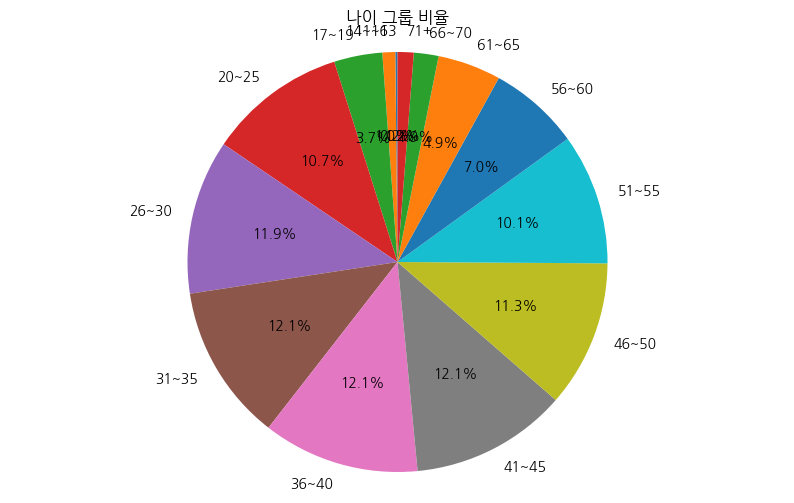

In [ ]:
# 나이 범위와 해당 비율을 딕셔너리로 정의
age_ratio = {
    '11~13': 0.001566,
    '14~16': 0.009397,
    '17~19': 0.035239,
    '20~25': 0.101018,
    '26~30': 0.112764,
    '31~35': 0.114330,
    '36~40': 0.114330,
    '41~45': 0.114330,
    '46~50': 0.107283,
    '51~55': 0.095536,
    '56~60': 0.066562,
    '61~65': 0.046202,
    '66~70': 0.018011,
    '71+': 0.011746,

}

# 나이 범위와 해당 비율을 기반으로 파이차트를 그리기 위한 데이터와 라벨 준비
age_labels = age_ratio.keys()
age_values = [age_ratio[label] for label in age_labels]

# 파이차트 그리기
plt.figure(figsize=(10, 6))
plt.pie(age_values, labels=age_labels, autopct='%1.1f%%', startangle=90)
plt.title('나이 그룹 비율')
plt.axis('equal')  # 원형 모양으로 보이도록 함
plt.show()

In [ ]:
df['성별'].value_counts(normalize = True)

남성    0.505367
여성    0.494633
Name: 성별, dtype: float64

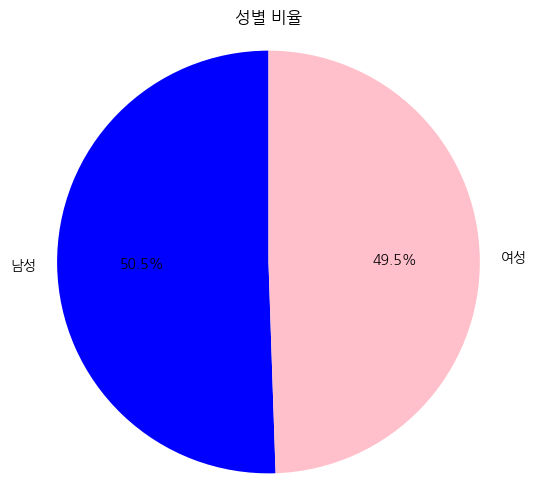

In [ ]:
# '남성'과 '여성'의 개수를 구합니다.
male_count = df[df['성별'] == '남성'].shape[0]
female_count = df[df['성별'] == '여성'].shape[0]

# 파이차트를 그리기 위한 데이터와 라벨 준비
gender_counts = [male_count, female_count]
gender_labels = ['남성', '여성']

# 파이차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])
plt.title('성별 비율')
plt.axis('equal')  # 원형 모양으로 보이도록 함
plt.show()

In [ ]:
df['채널명'].value_counts(normalize = True)
#네이버와 네이버 쇼핑 2개의 컬럼으로 합쳐서 분류를 해야 할지 고민이 됩니다.

네이버검색          0.103367
웹사이트           0.094753
네이버쇼핑-통합검색     0.092404
인스타그램          0.091621
네이버쇼핑-검색       0.091621
네이버페이          0.085356
네이버 블로그        0.081441
네이버쇼핑-서비스      0.070478
네이버 카페         0.064996
유튜브            0.063430
네이버톡톡          0.058731
구글검색           0.028191
네이버 모바일메인      0.023493
페이스북           0.021143
네이버모바일메인-쇼핑    0.014096
트위터            0.010963
기타채널           0.003132
네이버공통          0.000783
Name: 채널명, dtype: float64

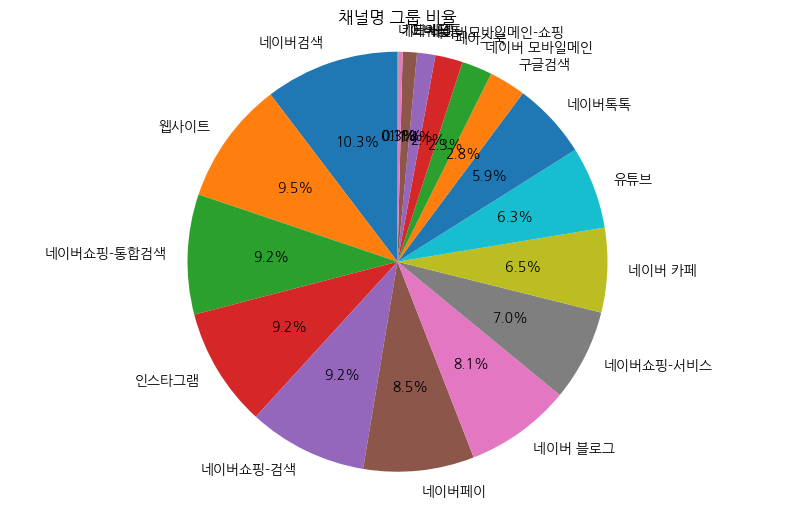

In [ ]:
# 채널명 그룹의 비율 계산
channel_ratio = df['채널명'].value_counts(normalize=True)

# 파이차트를 그리기 위한 데이터와 라벨 준비
channel_labels = channel_ratio.index
channel_values = channel_ratio.values

# 파이차트 그리기
plt.figure(figsize=(10, 6))
plt.pie(channel_values, labels=channel_labels, autopct='%1.1f%%', startangle=90)
plt.title('채널명 그룹 비율')
plt.axis('equal')  # 원형 모양으로 보이도록 함
plt.show()